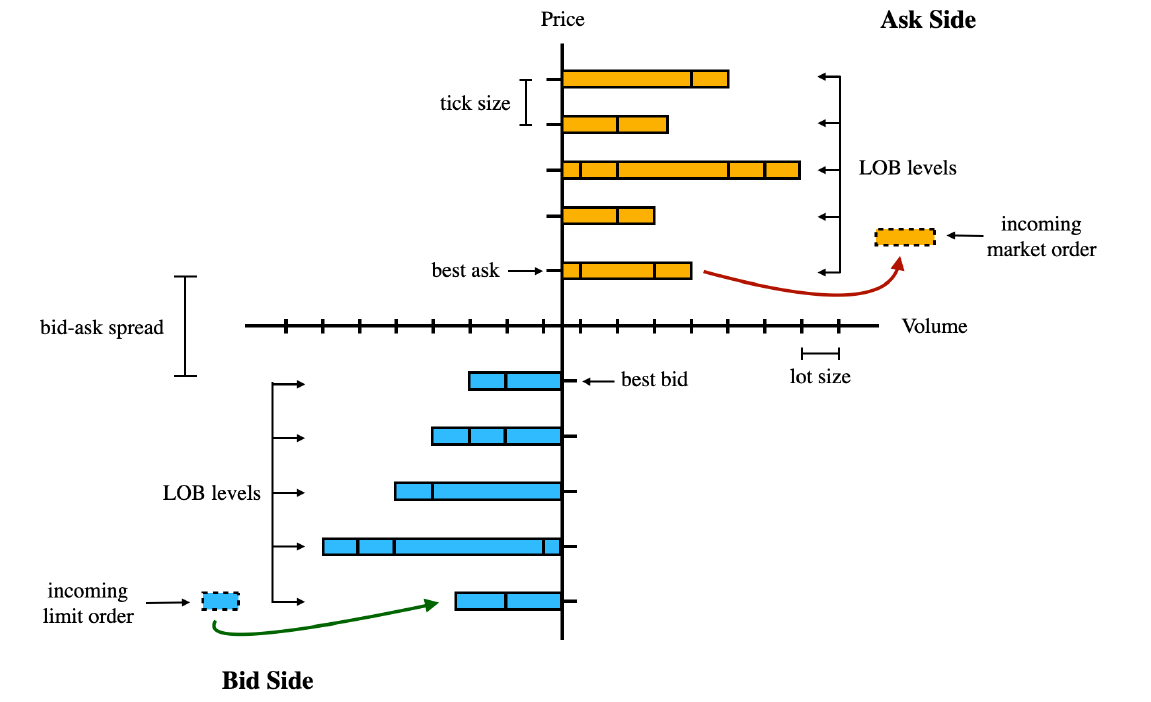

- 1. Go to https://lobsterdata.com/info/DataSamples.php and download the 10 level data for amazon and microsoft
- 2. Save in a folder named 'data' where this file is saved.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import numpy as np
from matplotlib.dates import DateFormatter
import os 
  
cwd=os.getcwd()

#The time component in the data is recorded in seconds after midnight.

startTrad = 9.5*60*60       # 9:30:00.000 in s after midnight
endTrad = 16*60*60        # 16:00:00.000 in s after midnight

# Message file information:
----------------------------------------------------------

  - Dimension:    (NumberEvents x 6)

  - Structure:    Each row:
                  Time stamp (sec after midnight with decimal
                  precision of at least milliseconds and
                  up to nanoseconds depending on the period),
                  Event type, Order ID, Size (# of shares),
                  Price, Direction

                  Event types:
                      - '1'   Submission new limit order
                      - '2'   Cancellation (partial)
                      - '3'   Deletion (total order)
                      - '4'   Execution of a visible limit order
                      - '5'   Execution of a hidden limit order
			- '7'   Trading Halt (Detailed 
                              information below)

                  Direction:
                      - '-1'  Sell limit order
                      - '1'  Buy limit order
                      - NOTE: Execution of a sell (buy)
                              limit order corresponds to
                              a buyer-(seller-) initiated
                              trade, i.e. a BUY (SELL) trade.

----------------------------------------------------------

This loads the data using Pandas. It filters for messages sent between 0930 and 1600.

In [2]:
def load_data(ticker='AMZN',time_format=False,startTrad=startTrad,endTrad=endTrad):

    theMessageBookFileName = ticker+"_2012-06-21_34200000_57600000_message_10.csv"  #change this if you load other samples
    theMessageBookFileName=os.path.join(cwd,"data",theMessageBookFileName) #specify data location (in this case inside 'data' folder)


    theMessageBook = pd.read_csv(theMessageBookFileName, names = ['Time','Type','OrderID','Size','Price','TradeDirection'])

    #we will need this for filtering the orderbook data#
    theMessageBook['row_index']=theMessageBook.index.values

    theMessageBookFiltered = theMessageBook[theMessageBook['Time'] >= startTrad] 
    theMessageBookFiltered = theMessageBookFiltered[theMessageBookFiltered['Time'] <= endTrad]
    
    if time_format:
        theMessageBookFiltered=theMessageBookFiltered.set_index(pd.to_datetime(theMessageBookFiltered.Time,unit='s'))
    
    return theMessageBookFiltered

In [3]:
msg_book_amzn=load_data(ticker='AMZN',time_format=True)
msg_book_msft=load_data(ticker='MSFT',time_format=True)

In [ ]:
# Q1: Check this has done what we think it should do. 
#Let's print the first rows and last rows of the dataframe.

In [4]:
msg_book_msft.head()

,Time,Type,OrderID,Size,Price,TradeDirection,row_index
Time,,,,,,,
1970-01-01 09:30:00.013994120,34200.013994,3,16085616,100,310400,-1,0
1970-01-01 09:30:00.013994120,34200.013994,1,16116348,100,310500,-1,1
1970-01-01 09:30:00.015247805,34200.015248,1,16116658,100,310400,-1,2
1970-01-01 09:30:00.015442111,34200.015442,1,16116704,100,310500,-1,3
1970-01-01 09:30:00.015789148,34200.015789,1,16116752,100,310600,-1,4


In [5]:
msg_book_amzn.tail()

,Time,Type,OrderID,Size,Price,TradeDirection,row_index
Time,,,,,,,
1970-01-01 15:59:59.872741285,57599.872741,3,286560364,100,2207600,-1,269743
1970-01-01 15:59:59.903989046,57599.903989,3,287142900,100,2206200,-1,269744
1970-01-01 15:59:59.955241980,57599.955242,3,286967592,170,2206900,-1,269745
1970-01-01 15:59:59.958244616,57599.958245,1,287174077,100,2206300,-1,269746
1970-01-01 15:59:59.959359650,57599.959360,3,287174077,100,2206300,-1,269747


In [ ]:
# Q2: How many events in this trading day for the two stocks?

In [5]:
print(msg_book_msft.shape)
print(msg_book_amzn.shape)

(668765, 7)
(269748, 7)


In [ ]:
# Q3: up to which temporal precision do we get the data? (minute/seconds,etc.)

t= 15:59:59.959359650 up to nanoseconds = 10^-9 seconds

In [ ]:
# Q4: create a 'summary' function that aggregates events by type (cancellations, hidden/visible etc.) 
# and (1) counts them and (2) calculate the share of volume traded. Any observation?

In [18]:
msg_book_msft.Size.sum() #total volume

347108132

What is the distribution of events?

In [6]:
#   - '1'   Submission new limit order
#   - '2'   Cancellation (partial)
#   - '3'   Deletion (total order)
#   - '4'   Execution of a visible limit order
#   - '5'   Execution of a hidden limit order
def summary(msg_book):
    summary=msg_book.groupby('Type')['Size'].agg(['count','sum'])
    summary=summary/summary.sum()
    summary['description']=summary.index.map({1:'New LO',2:'Cancel',3:'Deletion',4:'Execution visible',5:'Execution hidden'})
    return summary

In [1]:
#Q3: What does this function calculate?

#Count number event per type and volume per type + relative (%) volume and count

#Q4: Print the summary of the events for the two stocks AMZ & MSFT

#Q5: Which observation can we make about the occurrence of the different events?

In [15]:
msg_book_msft.groupby('Type')['Size'].agg(['count','sum']).sum() #total count and volume for all events (msft)

count       668765
sum      347108132
dtype: int64

In [7]:
summary(msg_book_msft)

,count,sum,description
Type,,,
1,0.492798,0.503541,New LO
2,0.008377,0.006280,Cancel
3,0.448862,0.458995,Deletion
4,0.044557,0.028486,Execution visible
5,0.005407,0.002699,Execution hidden


In [20]:
summary(msg_book_amzn)

,count,sum,description
Type,,,
1,0.489175,0.498550,New LO
2,0.010814,0.013223,Cancel
3,0.457679,0.457200,Deletion
4,0.033268,0.023469,Execution visible
5,0.009064,0.007558,Execution hidden


Check for trading halts.

----------------------------------------------------------
When trading halts, a message of type '7' is written into the 
'message' file. The corresponding price and trade direction 
are set to '-1' and all other properties are set to '0'. 

Should the resume of quoting be indicated by an additional 
message in NASDAQ's Historical TotalView-ITCH files, another 
message of type '7' with price '0' is added to the 'message' 
file. Again, the trade direction is set to '-1' and all other 
fields are set to '0'.

When trading resumes a message of type '7' and 
price '1' (Trade direction '-1' and all other 
entries '0') is written to the 'message' file. 

For messages 
of type '7', the corresponding order book rows contain a 
duplication of the preceding order book state. The reason 
for the trading halt is not included in the output.

Example: Stylized trading halt messages in 'message' file.				

Halt: 			36023	| 7 | 0 | 0 | -1 | -1
                                    ...
Quoting: 		36323 	| 7 | 0 | 0 | 0  | -1
                                    ...
Resume Trading:		36723   | 7 | 0 | 0 | 1  | -1
                                    ...
The vertical bars indicate the different columns in the message file.


Check on Nasdaq historical trading halts http://www.nasdaqtrader.com/Trader.aspx?id=TradeHalts# and reason for halts http://www.nasdaqtrader.com/Trader.aspx?id=TradeHaltCodes

NYSE https://www.nyse.com/trade-halt-current

In [9]:
def check_for_halts(theMessageBookFiltered):

    # Note: As the rows of the message and orderbook file correspond to each other, the time index of
    # the message file can also be used to 'cut' the orderbook file.

    # Check for trading halts
    # ----------------------------------------------------------
    tradingHaltIdx = theMessageBookFiltered.index[(theMessageBookFiltered.Type == 7) & (theMessageBookFiltered.Price == -1) & (theMessageBookFiltered.TradeDirection == -1)]

    tradeQuoteIdx = theMessageBookFiltered.index[(theMessageBookFiltered.Type == 7) & (theMessageBookFiltered.Price == 0)& (theMessageBookFiltered.TradeDirection == -1)]

    tradeResumeIdx = theMessageBookFiltered.index[(theMessageBookFiltered.Type == 7) & (theMessageBookFiltered.Price == 1)& (theMessageBookFiltered.TradeDirection == -1)]

    if (len(tradingHaltIdx) == 0 | len(tradeQuoteIdx) == 0  | len(tradeResumeIdx) == 0):
        print("No trading halts detected.")

    if(len(tradingHaltIdx) != 0):
        print("Data contains trading halt! at time stamp(s): "); print(list(tradingHaltIdx))

    if(len(tradeQuoteIdx) != 0):
        print(" Data contains quoting message! at time stamp(s)"); print(list(tradeQuoteIdx)) 

    if(len(tradeResumeIdx) != 0):
        print(" Data resumes trading! at time stamp(s) "); print(list(tradeResumeIdx))

In [10]:
check_for_halts(msg_book_amzn)
check_for_halts(msg_book_msft)

No trading halts detected.
No trading halts detected.


# Plot - Number of Executions and Trade Volume by Interval
_____________________________________________________________________________
              
Note: Difference between trades and executions

   The LOBSTER output records limit order executions
   and not what one might intuitively consider trades (market orders).

   Imagine a volume of 1000 is posted at the best ask
   price. Further, an incoming market buy order of
   volume 1000 is executed against the quote.

   The LOBSTER output of this trade depends on the
   composition of the volume at the best ask price.
   Take the following two scenarios with the best ask
 	 volume consisting of ...
   	(a) 1 sell limit order with volume 1000
   	(b) 5 sell limit orders with volume 200 each
      	(ordered according to time of submission)

    The LOBSTER output for case ...
      (a) shows one execution of volume 1000. If the
          incoming market order is matched with one
          standing limit order, execution and trade
          coincide.
      (b) shows 5 executions of volume 200 each with the
          same time stamp. The incoming order is matched
          with 5 standing limit orders and triggers 5
          executions.
          
  --> When the data does not contain errors, these events occur at the same time t (same side of the LOB): by grouping them all together one can reconstruct the volume of the incoming market order. In general though, HF data contains errors and reconstructing MOs from raw data is non-trivial.

  Bottom line:
      LOBSTER records the exact limit orders against
      which incoming market orders are executed. Trade size has to be
      inferred from the executions.

In [11]:
def visible_invisible_plot(df_in,ticker,rolling_seconds=300):
    #to resample we need to set index to a time index
    try:
        assert type(df_in.index)==pd.core.indexes.datetimes.DatetimeIndex
        
    except AssertionError:
        df=df_in.set_index(pd.to_datetime(df_in.Time,unit='s'))
    df=pd.DataFrame(df_in)
        
    #only select the trade executions (type 4 & 5)
    df=df[df.Type.isin([4,5])]


    #separate out the data of interest into separate columns, use fact that true =1 and  false=0
    df['Visible']=df.Type==4
    df['Visible size']=df['Visible']*df['Size']

    df['Invisible']=-1*(df.Type==5) #-1 multiplier to flip hidden trades on x axis.
    df['Invisible size']=df['Invisible']*df['Size']

    #resample data into 5 minute intervals, sum contents of each time bucket.
    resampled_data=df.resample(str(rolling_seconds)+'S',label='right').sum()


    #create a subplot with two axes which shares the x -time axis
    fig,axs=plt.subplots(2,1,sharex=True,figsize=(10,6))

    #using the plotting backend in pandas (pyplot by default)
    resampled_data[['Visible','Invisible']].plot(ax=axs[0],kind='area',color = ('#fc0417','#0c04fc'))
    axs[0].set_ylabel('Number of Executions')

    resampled_data[['Visible size','Invisible size']].plot(ax=axs[1],kind='area',color = ('#fc0417','#0c04fc'))
    _=axs[1].set_ylabel('Quantity of executions')
    
    axs[0].set_title(f'Invisible visible executions for {ticker} over {str(rolling_seconds)} sec rolling period')
    
    return resampled_data

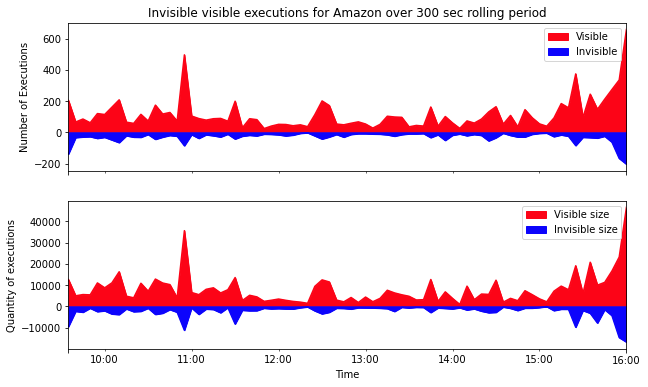

In [12]:
    
rsd_amzn=visible_invisible_plot(msg_book_amzn,"Amazon")

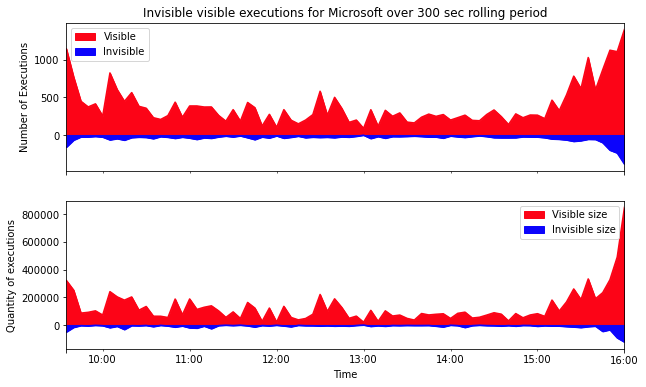

In [13]:
rsd_msft=visible_invisible_plot(msg_book_msft,"Microsoft")

Text(0.5, 1.0, 'Hidden order volume as % of total volume 5min rolling average')

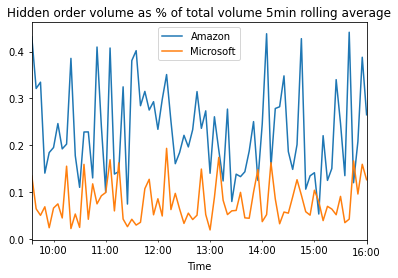

In [14]:
ax=(-1*rsd_amzn['Invisible size']/rsd_amzn['Size']).plot(label='Amazon')
(-1*rsd_msft['Invisible size']/rsd_msft['Size']).plot(ax=ax,label='Microsoft')
ax.legend()
ax.set_title('Hidden order volume as % of total volume 5min rolling average')

Now we are going to look at the order book data.

# Orderbook file information:
----------------------------------------------------------

  - Dimension:    (NumberEvents x (NumberLevels*4))

  - Structure:    Each row:
                  Ask price 1, Ask volume 1, Bid price 1,
                  Bid volume 1, Ask price 2, Ask volume 2,
                  Bid price 2, Bid volume 2, ...

  - Note:         Unoccupied bid (ask) price levels are
                  set to -9999999999 (9999999999) with volume 0.
				      
----------------------------------------------------------

In [15]:
def loadOrderBook(theMessageBook,ticker='AMZN'):
    #_____________________________________________________________________________
    #
    # Load Order Book File
    # This is going to output a dictionary of four dataframes - asks/bids prices/sizes
    #It will be indexed by the time index formed from the messagebook df
    #_____________________________________________________________________________
    nlevels = 10 #change number of levels

    # Load data
    theOrderBookFileName = ticker+"_2012-06-21_34200000_57600000_orderbook_10.csv"
    theOrderBookFileName=os.path.join(cwd,"data",theOrderBookFileName)
    print(theOrderBookFileName)

    col = ['Ask Price ','Ask Size ','Bid Price ','Bid Size ']
    theNames=[str(col_name)+str(level_no)  for level_no in range(1,nlevels+1) for col_name in col ]

    theOrderBook = pd.read_csv(theOrderBookFileName, names = theNames)
        
    #timeIndex = theMessageBook.index[(theMessageBook.Time >= startTrad) & (theMessageBook.Time <= endTrad)]
    #theOrderBookFiltered = theOrderBook[theOrderBook.index == timeIndex]
        
    theOrderBookFiltered = theOrderBook.iloc[theMessageBook.row_index]
    
    #theOrderBookFiltered=theOrderBookFiltered.set_index(pd.to_datetime(theMessageBook.Time,unit='s'))
    theOrderBookFiltered=theOrderBookFiltered.set_index(theMessageBook.index)
    
    # Convert prices into dollars
    #    Note: LOBSTER stores prices in dollar price times 10000

    col = ['Ask Price ','Ask Size ','Bid Price ','Bid Size ']

    #separate the four types of column into a dictionary with key=column type
    data_col_dic={c.strip():[c+str(level_no)  for level_no in range(1,nlevels+1)] for c in col}

    #separate data into four aligned dataframes of the four different types of data with key=data type
    data_dic={c:theOrderBookFiltered[cols] for c,cols in data_col_dic.items()}
      
    return data_dic

In [16]:
OB_dic_amzn=loadOrderBook(msg_book_amzn,ticker='AMZN')

OB_dic_msft=loadOrderBook(msg_book_msft,ticker='MSFT')

/Users/macbook/Dropbox/Market Microstructure/Lectures2022/Week3/LOBdemo/data/AMZN_2012-06-21_34200000_57600000_orderbook_10.csv
/Users/macbook/Dropbox/Market Microstructure/Lectures2022/Week3/LOBdemo/data/MSFT_2012-06-21_34200000_57600000_orderbook_10.csv


The output is a dictionary of dataframes. Each row of this dataset should refer to the orderbook state after a new event has happened. So it should be the same length. Let us check that.

In [20]:
def data_checker(OB_dic,msg_book):

    for k,val in OB_dic.items():
        
        assert val.shape[0]==msg_book.shape[0]
        print("ok!",k,type(val),val.shape)
    
data_checker(OB_dic_amzn,msg_book_amzn)
data_checker(OB_dic_msft,msg_book_msft)

ok! Ask Price <class 'pandas.core.frame.DataFrame'> (269748, 10)
ok! Ask Size <class 'pandas.core.frame.DataFrame'> (269748, 10)
ok! Bid Price <class 'pandas.core.frame.DataFrame'> (269748, 10)
ok! Bid Size <class 'pandas.core.frame.DataFrame'> (269748, 10)
ok! Ask Price <class 'pandas.core.frame.DataFrame'> (668765, 10)
ok! Ask Size <class 'pandas.core.frame.DataFrame'> (668765, 10)
ok! Bid Price <class 'pandas.core.frame.DataFrame'> (668765, 10)
ok! Bid Size <class 'pandas.core.frame.DataFrame'> (668765, 10)


In [ ]:
#Q6: check the structure of the data
#Q7: Compute bid, ask , mid-price, spread associated with each event.

In [17]:
OB_dic_msft

{'Ask Price':                                Ask Price 1  Ask Price 2  Ask Price 3  \
 Time                                                                   
 1970-01-01 09:30:00.013994120       309900       310500       310600   
 1970-01-01 09:30:00.013994120       309900       310500       310600   
 1970-01-01 09:30:00.015247805       309900       310400       310500   
 1970-01-01 09:30:00.015442111       309900       310400       310500   
 1970-01-01 09:30:00.015789148       309900       310400       310500   
 ...                                    ...          ...          ...   
 1970-01-01 15:59:59.861465727       301400       301500       301600   
 1970-01-01 15:59:59.861566671       301400       301500       301600   
 1970-01-01 15:59:59.873177404       301400       301500       301600   
 1970-01-01 15:59:59.907796528       301400       301500       301600   
 1970-01-01 15:59:59.907796528       301400       301500       301600   
 
                                Ask 

In [28]:
# You can quickly compute here for each event spread and gap..
bid_prices=OB_dic_amzn['Bid Price']
ask_prices=OB_dic_amzn['Ask Price']
bid_prices

,Bid Price 1,Bid Price 2,Bid Price 3,Bid Price 4,Bid Price 5,Bid Price 6,Bid Price 7,Bid Price 8,Bid Price 9,Bid Price 10
Time,,,,,,,,,,
1970-01-01 09:30:00.017459617,2231800,2230700,2230400,2230000,2226200,2213000,2204000,2202500,2202000,2189700
1970-01-01 09:30:00.189607670,2238100,2231800,2230700,2230400,2230000,2226200,2213000,2204000,2202500,2202000
1970-01-01 09:30:00.189607670,2238100,2231800,2230700,2230400,2230000,2226200,2213000,2204000,2202500,2202000
1970-01-01 09:30:00.189607670,2238100,2237500,2231800,2230700,2230400,2230000,2226200,2213000,2204000,2202500
1970-01-01 09:30:00.189607670,2238100,2237500,2231800,2230700,2230400,2230000,2226200,2213000,2204000,2202500
...,...,...,...,...,...,...,...,...,...,...
1970-01-01 15:59:59.872741285,2205100,2205000,2204800,2204700,2204600,2204500,2204400,2204300,2204200,2204100
1970-01-01 15:59:59.903989046,2205100,2205000,2204800,2204700,2204600,2204500,2204400,2204300,2204200,2204100
1970-01-01 15:59:59.955241980,2205100,2205000,2204800,2204700,2204600,2204500,2204400,2204300,2204200,2204100


In [29]:
spread=ask_prices['Ask Price 1']- bid_prices['Bid Price 1']
gapA= -ask_prices['Ask Price 1']+ask_prices['Ask Price 2']
gapB= bid_prices['Bid Price 1']-bid_prices['Bid Price 2']
mid =(ask_prices['Ask Price 1']+ bid_prices['Bid Price 1'])/2
mid

Time
1970-01-01 09:30:00.017459617    2235650.0
1970-01-01 09:30:00.189607670    2238800.0
1970-01-01 09:30:00.189607670    2238800.0
1970-01-01 09:30:00.189607670    2238800.0
1970-01-01 09:30:00.189607670    2238800.0
                                   ...    
1970-01-01 15:59:59.872741285    2205650.0
1970-01-01 15:59:59.903989046    2205750.0
1970-01-01 15:59:59.955241980    2205750.0
1970-01-01 15:59:59.958244616    2205700.0
1970-01-01 15:59:59.959359650    2205750.0
Length: 269748, dtype: float64

In [20]:
def order_book_look(OB_dic,ticker,random_no=None):
    # Note: Pick a random row/event from the order book if not specified
    
    if random_no is None:
        random_no = OB_dic['Bid Size'].sample().index[0]
    else:
        #first appearing event after the given time
        random_no=OB_dic['Bid Size'][OB_dic['Bid Size'].index>random_no].index[0]
      
    time=random_no.strftime('%H:%M:%S:%f')

    #
    # Plot 1 - Snapshot of the Limit Order Book
    #_____________________________________________________________________________

    fig,ax=plt.subplots(2,1,figsize=(9,9)) 

    bid_data=OB_dic['Bid Size'].loc[random_no]
    bid_prices=OB_dic['Bid Price'].loc[random_no]

    ask_data=OB_dic['Ask Size'].loc[random_no]
    ask_prices=OB_dic['Ask Price'].loc[random_no]


    ax[0].bar(ask_prices/10000,ask_data,
           width=0.007, color='#fc1b04', label='Ask')   # Divide price by 10000 to get price in dollars
    ax[0].bar(bid_prices/10000,bid_data,
           width=0.007,color='#13fc04', label='Bid')

    ax[0].set_ylabel('Quantity')
    ax[0].set_xlabel('Price($)')
    ax[0].set_title(f'Order book at {str(time)} for {ticker}')
    #_____________________________________________________________________________
    #
    # Plot 2 - Relative Depth in the Limit Order Book
    #_____________________________________________________________________________
    # Plot variables
    ax[1].step(range(1,11,1),bid_data.cumsum()/bid_data.sum(),label='Bid',color='#13fc04')
    ax[1].step(range(1,11,1),-1*ask_data.cumsum()/ask_data.sum(),label='Ask',color='#fc1b04')

    ax[1].set_ylim(-1,1)
    ax[1].set_xlim(1,10)
    #ax[1].set_title('Relative Depth in the Limit Order Book for ' + ticker + ' at ' + str(time))
    ax[1].set_ylabel('% Orderbook')
    ax[1].set_xlabel('Level')
    
    return random_no

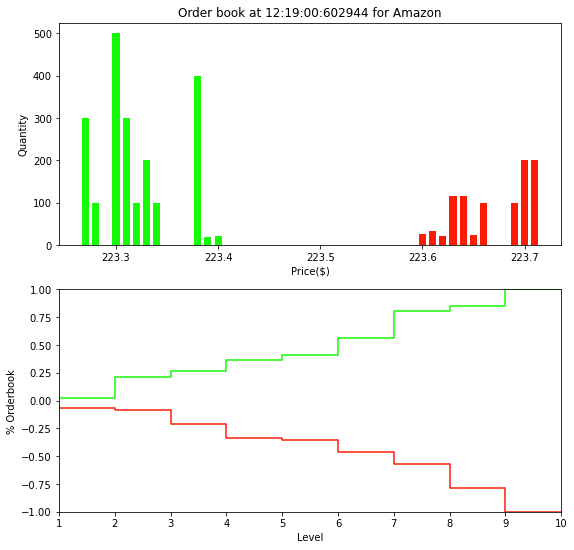

In [26]:
time=order_book_look(OB_dic_amzn,'Amazon')

Timestamp('1970-01-01 11:50:49.392675963')

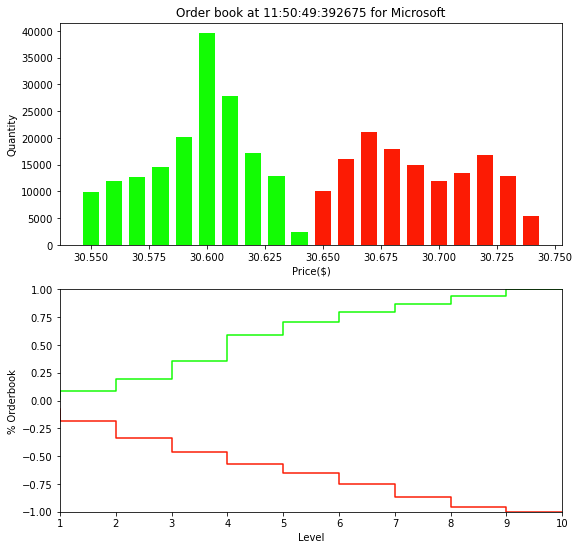

In [23]:
order_book_look(OB_dic_msft,'Microsoft',time)

# Event time vs time time

Event time is expressed as the sequence of events that occur in the limit order book. Sometimes it is convenient to think about of this as time instead of 'normal time'. 

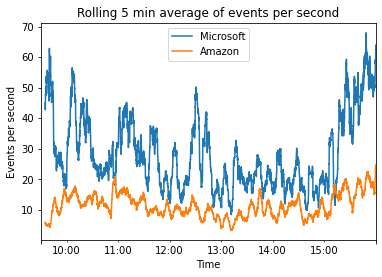

In [43]:
ax=msg_book_msft.resample("1S").count()['Time'].rolling(300).mean().plot(label='Microsoft',legend=True)
msg_book_amzn.resample("1S").count()['Time'].rolling(300).mean().plot(label='Amazon',legend=True,ax=ax,title='Rolling 5 min average of events per second')
_=ax.set_ylabel('Events per second')

Rolling average of events (all types of events here) per second...try selecting a sub-type (e.g. only executions)

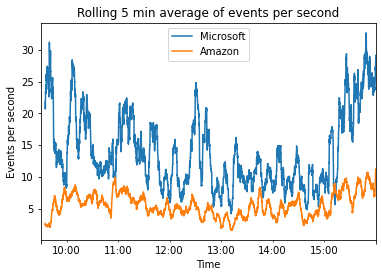

In [63]:
ax=msg_book_msft[msg_book_msft.Type==1].resample("1S").count()['Time'].rolling(300).mean().plot(label='Microsoft',legend=True)
msg_book_amzn[msg_book_amzn.Type==1].resample("1S").count()['Time'].rolling(300).mean().plot(label='Amazon',legend=True,ax=ax,title='Rolling 5 min average of events per second')
_=ax.set_ylabel('Events per second')

A little digression..

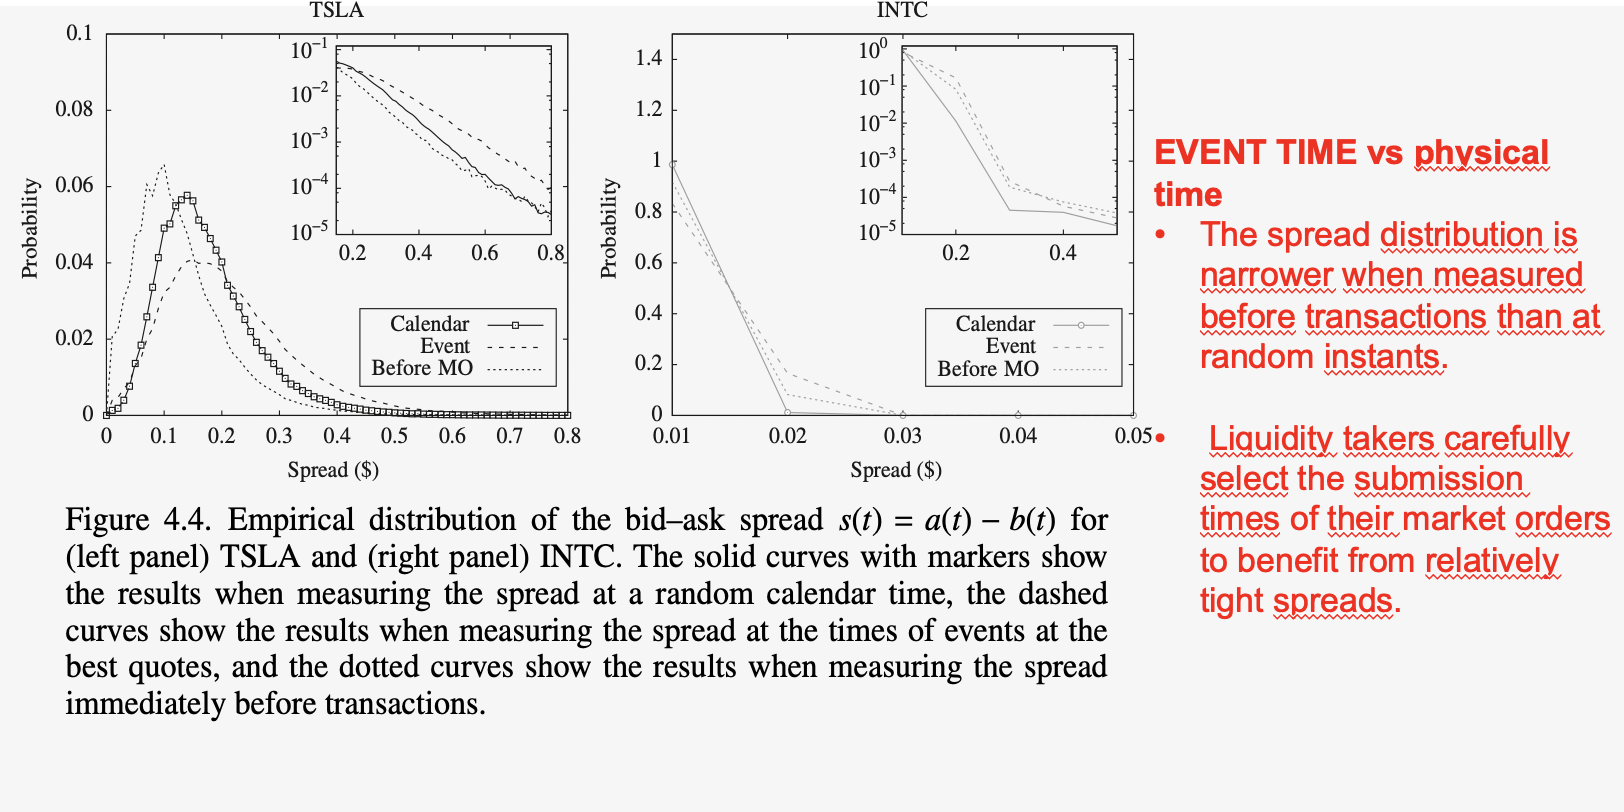

# Empirical properties of the LOB - large and small tick stocks

Now we are going to look at how a large tick stock - Microsoft differs from a small tick stock - Amazon.

In [70]:
def spread_plot(OB_dic,ticker,rolling_unit=2000):
    #This plots the spread at best varies over the day.

    spread=pd.DataFrame((OB_dic['Ask Price']['Ask Price 1']-OB_dic['Bid Price']['Bid Price 1']),columns=['spread'])
    #spread['normalised_spread_bps']=10000*0.5*spread['spread']/(OB_dic['Ask Price']['Ask Price 1']+OB_dic['Bid Price']['Bid Price 1'])

    
    ax=spread.plot()
    
    spread_res=spread.resample(str(rolling_unit)+'S',label='right').mean()
    spread_res.columns=[str(rolling_unit)+'S mavg']
    spread_res.plot(ax=ax,legend=True)
    
    ax.set_title(f'Spread over day of {ticker} in bps')
    
    myFmt=DateFormatter("%H:%m")
    ax.xaxis.set_major_formatter(myFmt)
    return spread

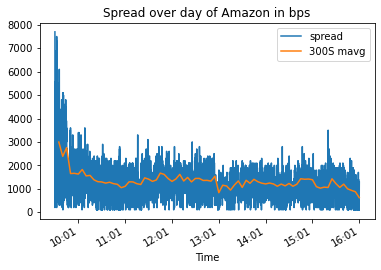

In [71]:
    
df=spread_plot(OB_dic_amzn,'Amazon',rolling_unit=300)

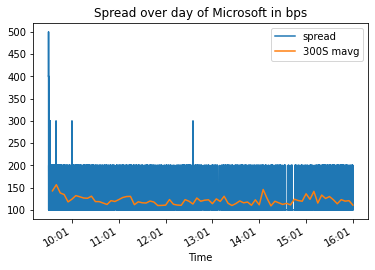

In [72]:
df=spread_plot(OB_dic_msft,'Microsoft',rolling_unit=300)

In [73]:
def depth_at_best_plot(OB_dic,ticker,events=2000,resample_per=300):
    
    
    depth=pd.DataFrame(OB_dic['Ask Size']['Ask Size 1'])
    depth.columns=['Best ask depth']
    
    #average of last 2000 quotes - might not be time consistent
    
    depth[str(events)+ ' event mavg']=depth.rolling(events).mean()
    ax=depth.plot()
    
    res_per=str(resample_per)+'S'
    depth_res=depth.resample(res_per,label='right').mean()
    depth_res.columns=[res_per+ ' mavg','_']
    depth_res[res_per+ ' mavg'].plot(ax=ax,legend=True)

    ax.set_title(f'Depth over day of {ticker}')
    ax.set_ylabel('Shares')
    
    return depth_res 

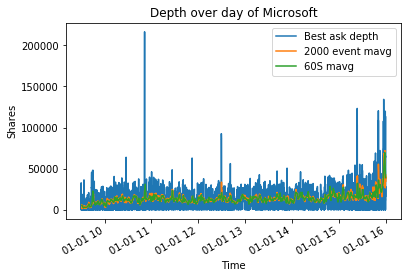

In [253]:
df=depth_at_best_plot(OB_dic_msft,'Microsoft',events=2000,resample_per=60)

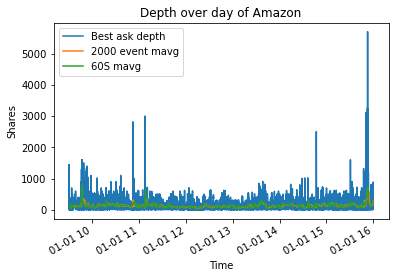

In [74]:
df=depth_at_best_plot(OB_dic_amzn,'Amazon',events=2000,resample_per=60)

In [75]:
def plot_net_limit_orders(msg_book,ticker):

    #filter out executions to leave LOs, cancels and deletes
    net_limit_orders=msg_book[msg_book.Type.isin([1,2,3])]
    
    net_limit_orders=net_limit_orders.set_index(pd.to_datetime(net_limit_orders.Time,unit='s'))
    
    #create a column =1 if a LO and  -1 if a delete cancel
    net_limit_orders['accrete_deplete']=net_limit_orders.Type.map({1:1,2:-1,3:-1})
    #multiply with quantity to get signed LO quantity
    net_limit_orders['signed_size']=net_limit_orders['accrete_deplete']*net_limit_orders['Size']
    #    Note: LOBSTER stores prices in dollar price times 10000
    net_limit_orders['signed_volume']=net_limit_orders['signed_size']*net_limit_orders['Price']/10000

    #resample time series into 5 minute intervals, sum over each 5 minutes, units of US$m and plot
    ax=(net_limit_orders.signed_volume.resample('300S',label='right').sum()/1000000).plot()
    ax.set_title(f"Net limit orders {ticker}")
    ax.set_ylabel('5 min LO net volume (m$)')
    

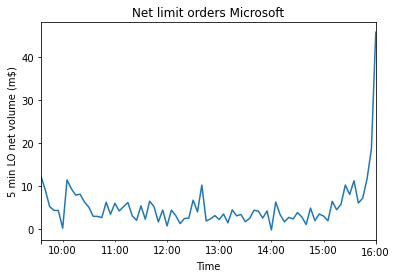

In [76]:
plot_net_limit_orders(msg_book_msft,"Microsoft")

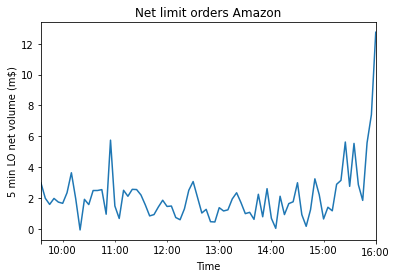

In [77]:
plot_net_limit_orders(msg_book_amzn,"Amazon")

# Event rates in the LOB

In [27]:
#get all of the LO submissions

def abs_dist(price,side,best_ask,best_bid):
    #little function to get absolute distance to best depending on order type
    if side==1:
        return best_bid-price
    elif side==-1:
        return price-best_ask



def event_rate(msg_book,OB_dic,Type=1):
    events=msg_book[msg_book.Type.isin([1])]
    
    #get the raw information we need from the Orderbook (Best bid and ask events)
    Best_state=pd.DataFrame({'Best_bid':OB_dic['Bid Price']['Bid Price 1'],
                             'Best_ask':OB_dic['Ask Price']['Ask Price 1']})
    
    #we want to know the state of the order book before submission of an order
    Best_state['prev_Best_bid']=Best_state.Best_bid.shift(1)
    Best_state['prev_Best_ask']=Best_state.Best_ask.shift(1)
    Best_state.fillna(0,inplace=True)

    #not necessary but this column return true if the best bid/ask has improved
    Best_state['Bid_improved']=Best_state['Best_bid']>Best_state['prev_Best_bid']
    Best_state['Ask_improved']=Best_state['Best_ask']<Best_state['prev_Best_ask']
    
    #merge the order book information with the message information    
        #events=events.merge(Best_state.iloc[events.row_index],left_on='row_index',right_on='row_index')
    #prefer concat because we know the rows are aligned. merge may get into trouble for simultaneous events.
    events=pd.concat([events,Best_state.iloc[events.row_index]],sort=False,axis=1)
    
    #apply absolute distance calculation row by row. 
    #This is slow way to do it but 
    events['abs_dist']=events.apply(lambda x: abs_dist(x['Price'],x['TradeDirection'],x['prev_Best_ask'],
                                                       x['prev_Best_bid']),axis=1 )
    
    
    
    return events


This is this the distribution of LO submissions wrt their absolute distance from best.

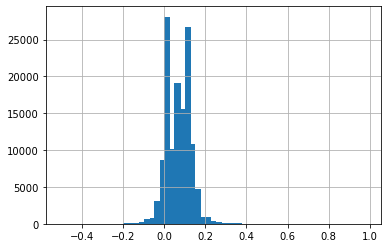

In [81]:
events_amzn=event_rate(msg_book_amzn,OB_dic_amzn,1)
(events_amzn['abs_dist']/10000).hist(bins=np.arange(-.5,1,0.025).round(2))

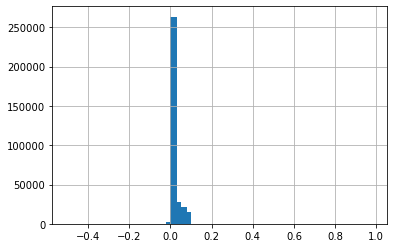

In [82]:
events_msft=event_rate(msg_book_msft,OB_dic_msft,1)
(events_msft['abs_dist']/10000).hist(bins=np.arange(-.5,1,0.025).round(2))

Note that there are LOs with negative absolute distance? These are best improving orders (bid above best or ask below)

In [83]:
bi=(events_msft.Bid_improved | events_msft.Ask_improved).value_counts()
bi/bi.sum()

False    0.993843
True     0.006157
dtype: float64

In [84]:
bi=events_amzn.Bid_improved.value_counts()
bi/bi.sum()

False    0.949899
True     0.050101
Name: Bid_improved, dtype: float64

##  Crypto data (BTC/USD trades Kraken)

In [1]:
import json

def load_json_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    # Split the content by lines and decode each line as a separate JSON object
    json_objects = [json.loads(line) for line in content.strip().splitlines()]
    
    return json_objects

def main():
    file_path = "/Users/macbook/Dropbox/Market Microstructure/Lectures2022/Week3/LOBdemo/BTC/BTC_1664358663996.json"
    data = load_json_file(file_path)
    
    # Print the first 5 rows
    for row in data[:5]:
        print(row)
        print('-' * 80)  # Separator for clarity

if __name__ == "__main__":
    main()

{'call': {'cp_or_account': 'kraken', 'func': 'watchOrderBook', 'args': ['BTC/USD']}, 'success': True, 'res': {'bids': [[18648.4, 0.1], [18643.3, 1.00004506], [18643.0, 2.62832254], [18642.7, 0.00378192], [18642.2, 0.02145268], [18642.1, 1.33560357], [18641.6, 0.7993458], [18641.5, 5.91736396], [18641.2, 1.0], [18640.8, 0.7]], 'asks': [[18648.5, 13.24263393], [18648.6, 8.98866958], [18649.0, 1.33575984], [18649.2, 8.74324269], [18649.7, 0.7879478], [18649.8, 0.56789436], [18649.9, 0.83110365], [18650.1, 0.07665821], [18650.2, 8.1864011], [18650.4, 0.07825633]], 'timestamp': 1664358670836, 'datetime': '2022-09-28T09:51:10.836Z', 'nonce': None, 'symbol': None}, 'exception': None, 'ts_call_start': 1664358664279.9087, 'ts_call_end': 1664358671182.9646, 'dt_call': 6903.055908203125}
--------------------------------------------------------------------------------
{'call': {'cp_or_account': 'kraken', 'func': 'watchOrderBook', 'args': ['BTC/USD']}, 'success': True, 'res': {'bids': [[18648.4, 0.

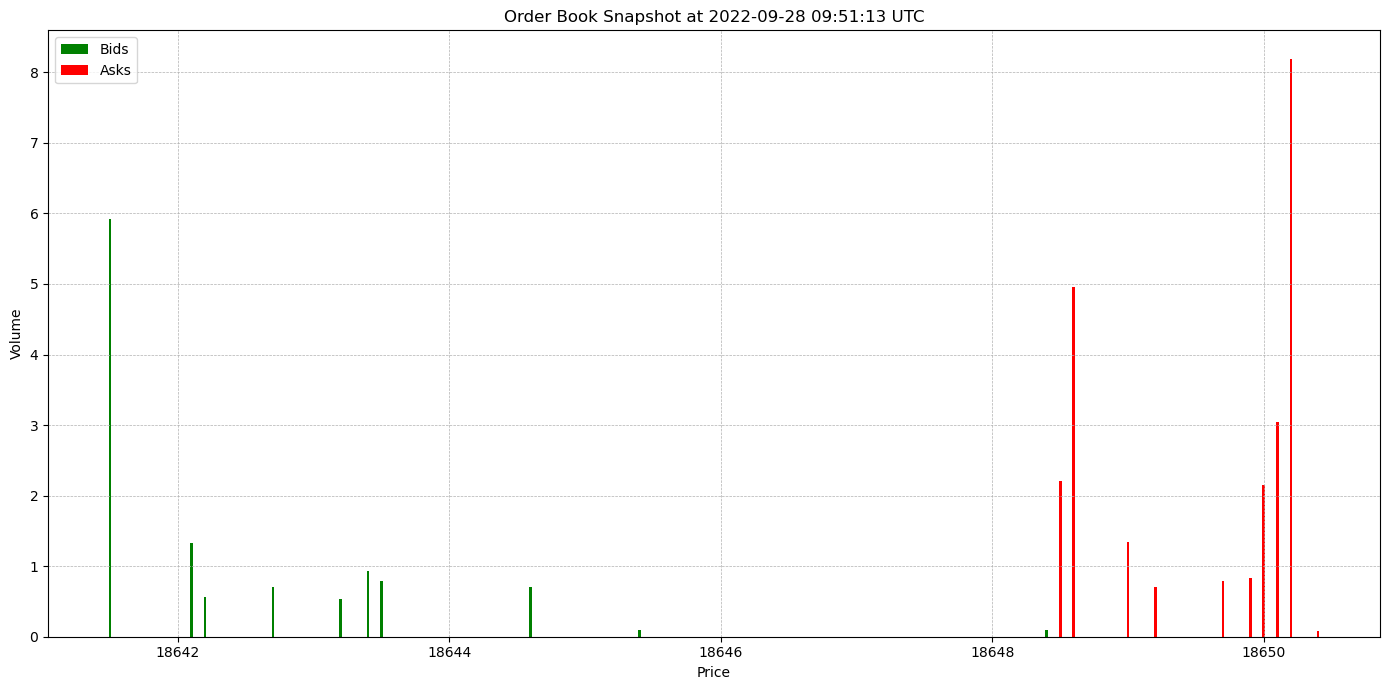

In [8]:
import matplotlib.pyplot as plt
from datetime import datetime

# Load the JSON data
def load_json_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    json_objects = [json.loads(line) for line in content.strip().splitlines()]
    return json_objects


file_path = "/Users/macbook/Dropbox/Market Microstructure/Lectures2022/Week3/LOBdemo/BTC/BTC_1664358663996.json"
data = load_json_file(file_path)

# Extract a sample item (you can choose any timestamp of your preference)
sample_item = data[60]  # Choosing the 51st record as a sample

# Extract bids and asks for the chosen timestamp
sample_bids = sample_item['res']['bids']
sample_asks = sample_item['res']['asks']

# Extracting price and volume for bids and asks
bid_prices_sample, bid_volumes_sample = zip(*sample_bids)
ask_prices_sample, ask_volumes_sample = zip(*sample_asks)


# Plotting the snapshot of the order book using bars
plt.figure(figsize=(14, 7))
plt.bar(bid_prices_sample, bid_volumes_sample, color='green', width=0.02, label='Bids', align='center')
plt.bar(ask_prices_sample, ask_volumes_sample, color='red', width=0.02, label='Asks', align='center')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.title(f'Order Book Snapshot at {datetime.utcfromtimestamp(sample_item["res"]["timestamp"] / 1000).strftime("%Y-%m-%d %H:%M:%S")} UTC')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Net Order Flow (NOF)

The net order flow for a given timestamp is calculated using the difference between the total volume of bids and the total volume of asks present in the order book at that timestamp.

The formula for the net order flow is:

\[
{NOF} = V_{{bids}} - V_{{asks}}
\]

Where:

- \( V_{{bids}} \) is the total volume of bids. It is calculated as:

\[
V_{{bids}} = \sum_{i=1}^{n} v_{{bid}_i}
\]

  * \( v_{{bid}_i} \) represents the volume of the \( i^{th} \) bid order.
  * \( n \) is the total number of bid orders in the order book at the given timestamp.




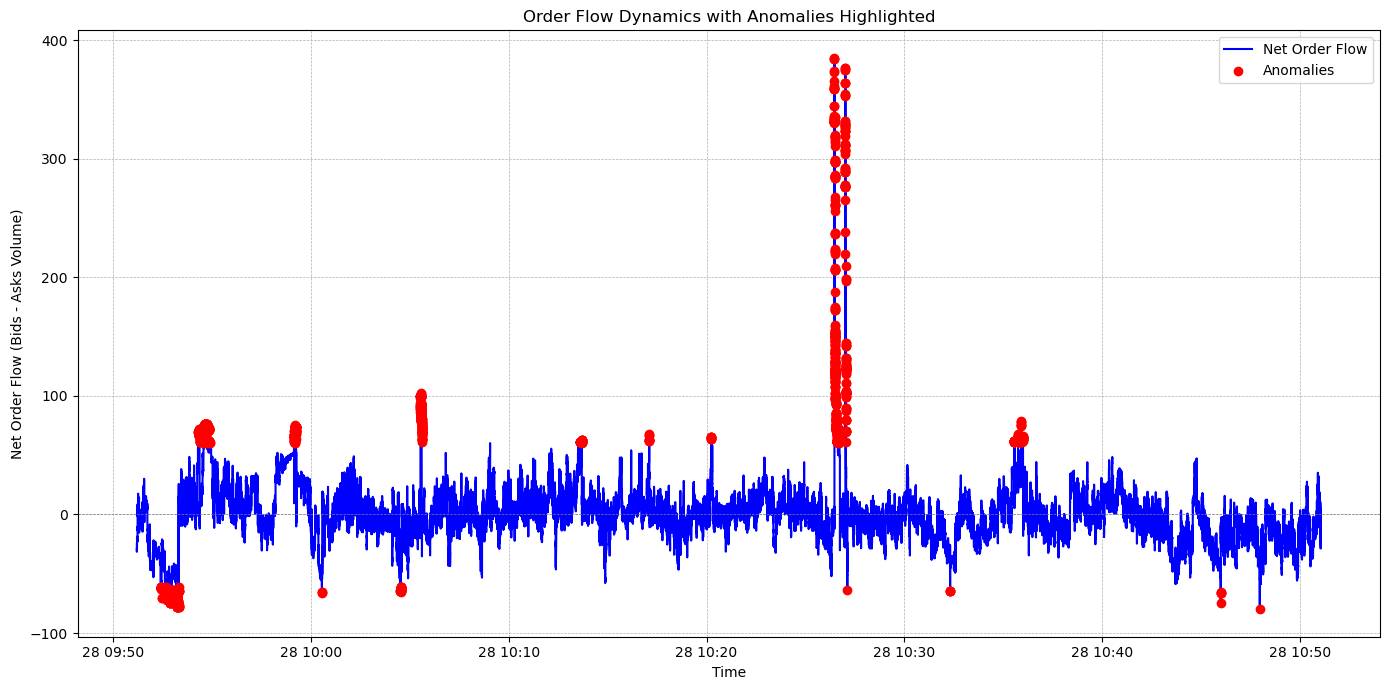

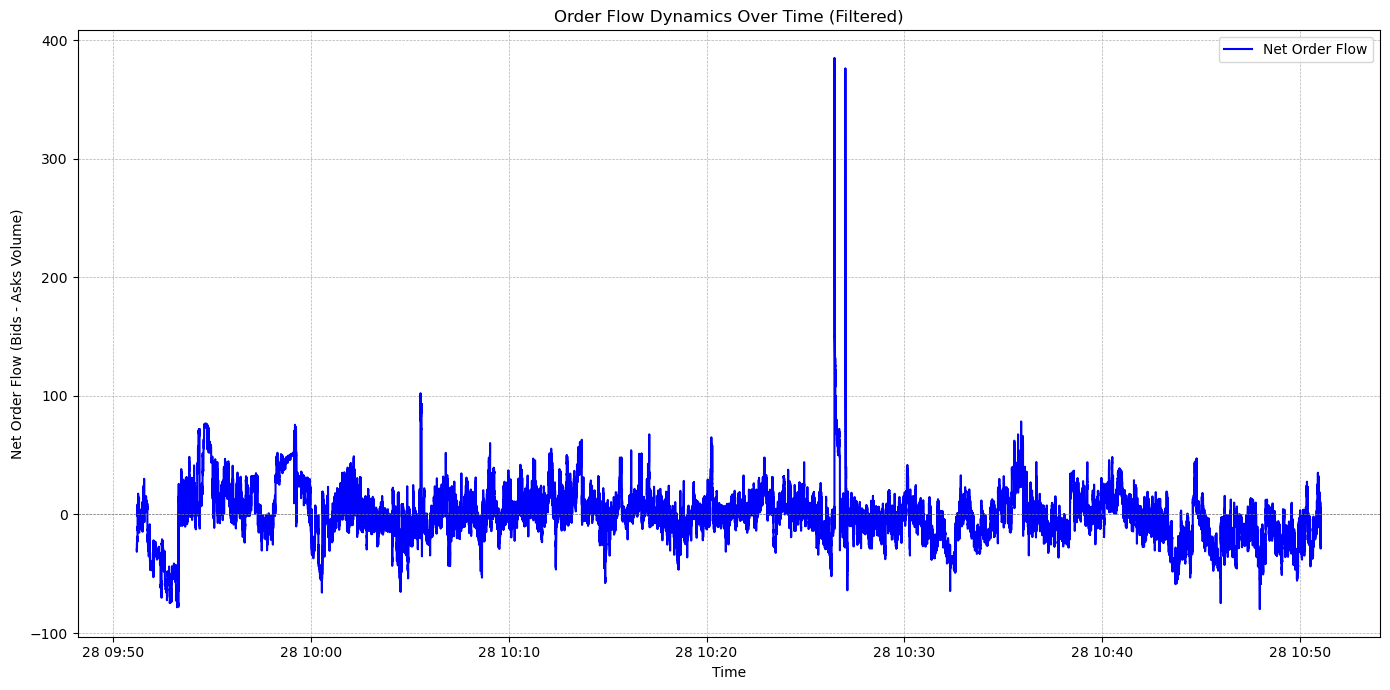

In [12]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# Function to load the JSON data
def load_json_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    json_objects = [json.loads(line) for line in content.strip().splitlines()]
    return json_objects

# Function to calculate net order flow (with filtering)
def calculate_net_order_flow_filtered(data):
    net_order_flow = []
    for item in data:
        try:
            bids_volume = sum(volume for price, volume in item['res']['bids'])
            asks_volume = sum(volume for price, volume in item['res']['asks'])
            net_flow = bids_volume - asks_volume
            timestamp = item['res']['timestamp']
            net_order_flow.append((timestamp, net_flow))
        except (KeyError, TypeError):
            continue
    return net_order_flow

# Load data, calculate net order flow, and plot
file_path_new = "/Users/macbook/Dropbox/Market Microstructure/Lectures2022/Week3/LOBdemo/BTC/BTC_1664358663996.json"
data_new = load_json_file(file_path_new)
net_order_flow_filtered = calculate_net_order_flow_filtered(data_new)
timestamps_flow_filtered, flows_filtered = zip(*net_order_flow_filtered)
timestamps_flow_datetime_filtered = [datetime.utcfromtimestamp(ts / 1000) for ts in timestamps_flow_filtered]

# Calculate mean and standard deviation for net order flow
mean_flow = np.mean(flows_filtered)
std_flow = np.std(flows_filtered)
# Define a threshold for anomalies (3 standard deviations from the mean)
threshold = 3 * std_flow

# Detect anomalies
anomalies = [(timestamp, flow) for timestamp, flow in net_order_flow_filtered if abs(flow - mean_flow) > threshold]
anomaly_timestamps, anomaly_values = zip(*anomalies)
anomaly_timestamps_datetime = [datetime.utcfromtimestamp(ts / 1000) for ts in anomaly_timestamps]


plt.figure(figsize=(14, 7))
plt.plot(timestamps_flow_datetime_filtered, flows_filtered, color='blue', label='Net Order Flow')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Net Order Flow (Bids - Asks Volume)')
plt.title('Order Flow Dynamics Over Time (Filtered)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# Plot net order flow and highlight anomalies
plt.figure(figsize=(14, 7))
plt.plot(timestamps_flow_datetime_filtered, flows_filtered, color='blue', label='Net Order Flow')
plt.scatter(anomaly_timestamps_datetime, anomaly_values, color='red', label='Anomalies', zorder=5)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Net Order Flow (Bids - Asks Volume)')
plt.title('Order Flow Dynamics with Anomalies Highlighted')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

